In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# HOW TO DOWNLOAD DATASETS

## 1. Village Level Shapefiles

In [2]:
# Village level shapefiles can be downloaded from the link below:

# https://sedac.ciesin.columbia.edu/data/set/india-india-village-level-geospatial-socio-econ-1991-2001/data-download

# To convert village level shapefiles into GEOJSON format, use the link below:

# https://drive.google.com/file/d/1lYzn4x0b4kiIGNfvu1tNKrmAJpWJT-GT/view

## 2. Census Variables

In [3]:
# If you want to know how to download census variables, you can check the link below:

# https://drive.google.com/file/d/1UhY6fKMd0j1hGkkQuevBU6od3INPBeuM/view

## 3. Download SHRUG Keys for Mapping

In [4]:
# Check the below link:

# https://www.devdatalab.org/shrug_download/

# a) Open Core Keys (4)
# b) Download csv file of Population Census Keys

# Libraries

In [5]:
import geopandas as gpd
import os
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Set the working directory
pwd = "/content/drive/MyDrive/Admin_boundaries(Aatif)/Shapefiles"
os.chdir(pwd)

# SHRUG Mapping (Do it once only)

In [ ]:
pc01r = os.path.join(pwd, "shrug-pc-keys-csv\\pc01r_shrid_key.csv")
pc11r = os.path.join(pwd, "shrug-pc-keys-csv\\pc11r_shrid_key.csv")
pc01u = os.path.join(pwd, "shrug-pc-keys-csv\\pc01u_shrid_key.csv")
pc11u = os.path.join(pwd,"shrug-pc-keys-csv\\pc11u_shrid_key.csv")

In [ ]:
pc01r = pd.read_csv(pc01r)
pc11r = pd.read_csv(pc11r)
pc01u = pd.read_csv(pc01u)
pc11u = pd.read_csv(pc11u)

In [ ]:
# Concatenating the DataFrames
pc01u = pc01u.rename(columns={'pc01_town_id': 'pc01_village_id'})
pc_01 = pd.concat([pc01u, pc01r])

pc11u = pc11u.rename(columns={'pc11_town_id': 'pc11_village_id'})
pc_11 = pd.concat([pc11u, pc11r])

In [ ]:
pc_01 = pc_01.set_index('shrid2')
pc_11 = pc_11.set_index('shrid2')

In [ ]:
# pc_01 will go into pc_11
final = pc_11.join(pc_01)
final.columns

In [ ]:
columns_to_drop = ['pc11_land_area', 'pc11_pca_tot_p', 'pc01_land_area', 'pc01_pca_tot_p']
final = final.drop(columns=columns_to_drop)

In [ ]:
final.head()

In [ ]:
# Save the final DataFrame as a CSV file
output_path = os.path.join(pwd, "SHRUG.csv")
final.to_csv(output_path)

# Remove all variables from GEOJSON because these are features from census 2001 and we want to add census variables 2011

In [ ]:
# Define the input and output folders
input_folder = os.path.join(pwd, "Villages2001/With_MetaData")
output_folder = os.path.join(pwd, "Villages2001/Without_MetaData")


In [ ]:
# Define the required columns
columns_to_keep = ['SID', 'DID', 'TID', 'VILL_CODE', 'C_CODE01', 'NAME', 'UID',
                    'CENSUS_COD', 'STATE', 'DISTRICT', 'SUB_DIST', 'TOWN_VILL',
                    'WARD', 'EB', 'LEVEL', 'NAME_1', 'TRU', 'geometry']

In [ ]:
# Loop through all files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".geojson"):
        # Construct the full path to the file
        input_path = os.path.join(input_folder, filename)

        # Read the GeoJSON file
        gdf = gpd.read_file(input_path)

        gdf['TID'] = gdf['TID'].fillna(0)
        gdf['DID'] = gdf['DID'].fillna(0)

        # Replace 0 values in 'STATE', 'DISTRICT', and 'SUB_DIST' columns with corresponding values from 'SID', 'DID', and 'TID'
        gdf['STATE'] = gdf.apply(lambda row: int(row['SID']) if row['STATE'] == 0 else row['STATE'], axis=1)
        gdf['DISTRICT'] = gdf.apply(lambda row: int(row['DID']) if row['DISTRICT'] == 0 else row['DISTRICT'], axis=1)
        gdf['SUB_DIST'] = gdf.apply(lambda row: int(row['TID']) if row['SUB_DIST'] == 0 else row['SUB_DIST'], axis=1)

        # Select only the specified columns
        gdf_selected = gdf[columns_to_keep]

        # Construct the output path
        output_path = os.path.join(output_folder, filename)

        # Save the selected columns to a new GeoJSON file
        gdf_selected.to_file(output_path, driver="GeoJSON")
        print(f"Processed and saved {filename}!")

Processed and saved JK.geojson!
Processed and saved KA.geojson!
Processed and saved KL.geojson!
Processed and saved MN.geojson!
Processed and saved MP.geojson!
Processed and saved MZ.geojson!
Processed and saved OR.geojson!
Processed and saved PB.geojson!
Processed and saved RJ.geojson!
Processed and saved SK.geojson!
Processed and saved TN.geojson!
Processed and saved TR.geojson!
Processed and saved UK.geojson!
Processed and saved UP.geojson!
Processed and saved UTERR.geojson!
Processed and saved WB.geojson!


# Map SHRUG and Shapefiles

In [ ]:
input_geojson_folder = os.path.join(pwd, "Villages2001/Without_MetaData")
output_geojson_folder = os.path.join(pwd, "Data_2011/Villages2011/Without_MetaData")
mapping_file_path = os.path.join(pwd, "SHRUG.csv")

In [ ]:
# Load the mapping CSV
mapping = pd.read_csv(mapping_file_path)
mapping.fillna(0, inplace=True)
mapping[['pc01_state_id', 'pc01_district_id', 'pc01_subdistrict_id', 'pc01_village_id']] = mapping[['pc01_state_id', 'pc01_district_id', 'pc01_subdistrict_id', 'pc01_village_id']].astype(int)
mapping = mapping.set_index('pc01_village_id', drop=False)


In [ ]:
# Dictionary to map filenames to state IDs
state_id_dict = {
    "AP.geojson": 28,
    "AS.geojson": 18,
    "BR.geojson": 10,
    "CG.geojson": 22,
    "GA.geojson": 30,
    "GJ.geojson": 24,
    "HR.geojson": 6,
    "HP.geojson": 2,
    "JK.geojson": 1,
    "JH.geojson": 20,
    "KA.geojson": 29,
    "KL.geojson": 32,
    "MP.geojson": 23,
    "MH.geojson": 27,
    "MN.geojson": 14,
    "MZ.geojson": 15,
    "OR.geojson": 21,
    "PB.geojson": 3,
    "RJ.geojson": 8,
    "SK.geojson": 11,
    "TN.geojson": 33,
    "TR.geojson": 16,
    "UP.geojson": 9,
    "UK.geojson": 5,
    "WB.geojson": 19,
    #"UTERR.geojson"    # SINCE UTERR.geojson has multiple State IDs
}

In [ ]:
# Loop through the state_id_dict to process each file
for filename, state_id in state_id_dict.items():
    # Filter the mapping data for the current state ID
    state_mapping = mapping[mapping['pc01_state_id'] == state_id]

    # Construct the full path to the input GeoJSON file
    input_geojson_path = os.path.join(input_geojson_folder, filename)

    # Load the GeoJSON file
    shapefile = gpd.read_file(input_geojson_path)
    shapefile = shapefile.set_index('TOWN_VILL')
    #shapefile = shapefile.set_index('TOWN_VILL', drop=False)

    shapefile['TID'] = shapefile['TID'].fillna(0)
    shapefile['DID'] = shapefile['DID'].fillna(0)

    # Replace 0 values in 'STATE', 'DISTRICT', and 'SUB_DIST' columns with corresponding values from 'SID', 'DID', and 'TID'
    shapefile['STATE'] = shapefile.apply(lambda row: int(row['SID']) if row['STATE'] == 0 else row['STATE'], axis=1)
    shapefile['DISTRICT'] = shapefile.apply(lambda row: int(row['DID']) if row['DISTRICT'] == 0 else row['DISTRICT'], axis=1)
    shapefile['SUB_DIST'] = shapefile.apply(lambda row: int(row['TID']) if row['SUB_DIST'] == 0 else row['SUB_DIST'], axis=1)


    # Join the shapefile data with the mapping data
    final = shapefile.join(state_mapping)
    final.fillna(0, inplace=True)

    # Remove rows where 'TOWN_VILL' is 0
    #final = final[final['TOWN_VILL'] != 0]

    # Construct the output path
    output_geojson_path = os.path.join(output_geojson_folder, filename)

    # Save the final GeoJSON file
    final.to_file(output_geojson_path, driver="GeoJSON")
    print("Done!")

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!


# Add 2011 MetaData

In [ ]:
input_geojson_folder = os.path.join(pwd, "Data_2011/Villages2011/Without_MetaData")
output_geojson_folder = os.path.join(pwd, "Data_2011/Villages2011/With_MetaData")
census_data_path = os.path.join(pwd, "Census2011_Data/Village_level_population_enumeration_2011.csv")
predictions_data_path = os.path.join(pwd, "Census2011_Data/Village_Level_Predictions_14_States.csv")

In [ ]:
# Load and process the population data
pop = pd.read_csv(census_data_path)
columns_to_drop_pop = ["District", "Subdistt", "Ward", "EB", "Level", "Name", "TRU"]
pop = pop.drop(columns=columns_to_drop_pop)

In [ ]:
# Load and process the predictions data
adi = pd.read_csv(predictions_data_path)
columns_to_drop_adi = ['Unnamed: 0', 'Village_2001_ID', 'Village_Name']
adi = adi.drop(columns=columns_to_drop_adi)
adi = adi.set_index('Village_2011_ID')

<ipython-input-11-88efab7cbefd>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  adi = pd.read_csv(predictions_data_path)


In [ ]:
# Dictionary to map filenames to state IDs
state_id_dict = {
    "AP.geojson": 28,
    "AS.geojson": 18,
    "BR.geojson": 10,
    "CG.geojson": 22,
    "GA.geojson": 30,
    "GJ.geojson": 24,
    "HR.geojson": 6,
    "HP.geojson": 2,
    "JK.geojson": 1,
    "JH.geojson": 20,
    "KA.geojson": 29,
    "KL.geojson": 32,
    "MP.geojson": 23,
    "MH.geojson": 27,
    "MN.geojson": 14,
    "MZ.geojson": 15,
    "OR.geojson": 21,
    "PB.geojson": 3,
    "RJ.geojson": 8,
    "SK.geojson": 11,
    "TN.geojson": 33,
    "TR.geojson": 16,
    "UP.geojson": 9,
    "UK.geojson": 5,
    "WB.geojson": 19,
    #"UTERR.geojson"    # SINCE UTERR.geojson has multiple State IDs
}

In [ ]:
# Loop through the state_id_dict to process each file
for filename, state_id in state_id_dict.items():
    # Filter the population data for the current state ID
    pop_filtered = pop[pop['State'] == state_id]
    pop_filtered = pop_filtered.set_index('Town/Village')

    # Join the population data with the predictions data
    features = pop_filtered.join(adi)
    features.fillna(0, inplace=True)
    features.index = features.index.astype(int)

    # Construct the full path to the input GeoJSON file
    input_geojson_path = os.path.join(input_geojson_folder, filename)

    # Load the GeoJSON file
    gdf = gpd.read_file(input_geojson_path)
    gdf = gdf.set_index('pc11_village_id')
    #gdf = gdf.set_index('pc11_village_id', drop=False)
    gdf.index = gdf.index.astype(int)

    # Join the GeoJSON data with the features data
    shapefiles_2011 = gdf.join(features)
    shapefiles_2011.fillna(0, inplace=True)

    # Construct the output path
    output_geojson_path = os.path.join(output_geojson_folder, filename)

    # Save the final GeoJSON file
    shapefiles_2011.to_file(output_geojson_path, driver="GeoJSON")
    print("Done!")

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!


# Remove Duplicates from 2011 Villages Shapefiles

In [ ]:
# Define the input and output folders
folder_path = os.path.join(pwd, "Data_2011/Villages2011/With_MetaData")

# DO IT FOR ALL THE 3 FOLDERS
# 1. With_MetaData
# 2. Without_MetaData
# 3. With_MetaData_AHI&RWI

In [ ]:
# Loop over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".geojson"):
        file_path = os.path.join(folder_path, filename)

        # Load the GeoDataFrame
        gdf = gpd.read_file(file_path)

        # Remove duplicate rows
        gdf_cleaned = gdf.drop_duplicates()

        # Replace the old file with the new cleaned file
        gdf_cleaned.to_file(file_path, driver='GeoJSON')

        print(f"Processed and updated file: {filename}")

Processed and updated file: AP.geojson
Processed and updated file: AS.geojson
Processed and updated file: BR.geojson
Processed and updated file: CG.geojson
Processed and updated file: GA.geojson
Processed and updated file: GJ.geojson
Processed and updated file: HR.geojson
Processed and updated file: HP.geojson
Processed and updated file: JK.geojson
Processed and updated file: JH.geojson
Processed and updated file: KA.geojson
Processed and updated file: KL.geojson
Processed and updated file: MP.geojson
Processed and updated file: MH.geojson
Processed and updated file: MN.geojson
Processed and updated file: MZ.geojson
Processed and updated file: OR.geojson
Processed and updated file: PB.geojson
Processed and updated file: RJ.geojson
Processed and updated file: SK.geojson
Processed and updated file: TN.geojson
Processed and updated file: TR.geojson
Processed and updated file: UP.geojson
Processed and updated file: UK.geojson
Processed and updated file: WB.geojson


In [7]:
# Define the input and output folders
folder_path1 = os.path.join(pwd, "Data_2011/Villages2011/Without_MetaData")

# DO IT FOR ALL THE 3 FOLDERS
# 1. With_MetaData
# 2. Without_MetaData
# 3. With_MetaData_AHI&RWI

In [ ]:
# Loop over all files in the folder
for filename in os.listdir(folder_path1):
    if filename.endswith(".geojson"):
        file_path = os.path.join(folder_path1, filename)

        # Load the GeoDataFrame
        gdf = gpd.read_file(file_path)

        # Remove duplicate rows
        gdf_cleaned = gdf.drop_duplicates()

        # Replace the old file with the new cleaned file
        gdf_cleaned.to_file(file_path, driver='GeoJSON')

        print(f"Processed and updated file: {filename}")

Processed and updated file: AP.geojson
Processed and updated file: AS.geojson
Processed and updated file: BR.geojson
Processed and updated file: CG.geojson
Processed and updated file: GA.geojson
Processed and updated file: GJ.geojson
Processed and updated file: HR.geojson
Processed and updated file: HP.geojson
Processed and updated file: JK.geojson
Processed and updated file: JH.geojson
Processed and updated file: KA.geojson
Processed and updated file: KL.geojson
Processed and updated file: MP.geojson
Processed and updated file: MH.geojson
Processed and updated file: MN.geojson
Processed and updated file: MZ.geojson
Processed and updated file: OR.geojson
Processed and updated file: PB.geojson
Processed and updated file: RJ.geojson
Processed and updated file: SK.geojson
Processed and updated file: TN.geojson
Processed and updated file: TR.geojson
Processed and updated file: UP.geojson
Processed and updated file: UK.geojson
Processed and updated file: WB.geojson


In [ ]:
# Define the input and output folders
folder_path2 = os.path.join(pwd, "Data_2011/Villages2011/With_MetaData_AHI&RWI")

# DO IT FOR ALL THE 3 FOLDERS
# 1. With_MetaData
# 2. Without_MetaData
# 3. With_MetaData_AHI&RWI

In [ ]:
# Loop over all files in the folder
for filename in os.listdir(folder_path2):
    if filename.endswith(".geojson"):
        file_path = os.path.join(folder_path2, filename)

        # Load the GeoDataFrame
        gdf = gpd.read_file(file_path)

        # Remove duplicate rows
        gdf_cleaned = gdf.drop_duplicates()

        # Replace the old file with the new cleaned file
        gdf_cleaned.to_file(file_path, driver='GeoJSON')

        print(f"Processed and updated file: {filename}")

Processed and updated file: AP.geojson
Processed and updated file: AS.geojson
Processed and updated file: BR.geojson
Processed and updated file: CG.geojson
Processed and updated file: GA.geojson
Processed and updated file: GJ.geojson
Processed and updated file: HR.geojson
Processed and updated file: HP.geojson
Processed and updated file: JK.geojson
Processed and updated file: JH.geojson
Processed and updated file: KA.geojson
Processed and updated file: KL.geojson
Processed and updated file: MP.geojson
Processed and updated file: MH.geojson
Processed and updated file: MN.geojson
Processed and updated file: MZ.geojson
Processed and updated file: OR.geojson
Processed and updated file: PB.geojson
Processed and updated file: RJ.geojson
Processed and updated file: SK.geojson
Processed and updated file: TN.geojson
Processed and updated file: TR.geojson
Processed and updated file: UP.geojson
Processed and updated file: UK.geojson
Processed and updated file: WB.geojson


# Merge to create SubDistrict shapefiles 2001

In [ ]:
input_folder = os.path.join(pwd,"Villages2001/Without_MetaData")
output_folder = os.path.join(pwd,"SubDistricts/2001_Without_MetaData")

In [ ]:
# Iterate over each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".geojson"):  # Ensure it's a GeoJSON file
        # Read the GeoJSON file
        shapefile = gpd.read_file(os.path.join(input_folder, filename))

        # Select necessary columns
        gdf_temp = shapefile[['STATE', 'DISTRICT', 'SUB_DIST', 'geometry']]

        # Filter out rows where SUB_DIST is 0 (assuming 0 is not a valid subdistrict)
        gdf_temp = gdf_temp[gdf_temp['SUB_DIST'] != 0]

        # Dissolve subdistricts within each district
        zones = gdf_temp.dissolve(by=['STATE', 'DISTRICT', 'SUB_DIST'])

        # Save as GeoJSON file
        output_geojson = os.path.join(output_folder, filename)
        zones.to_file(output_geojson, driver='GeoJSON')
        print("done")

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [ ]:
regions_agg = gpd.read_file(os.path.join(pwd,"SubDistricts/2001_Without_MetaData/OR.geojson"))

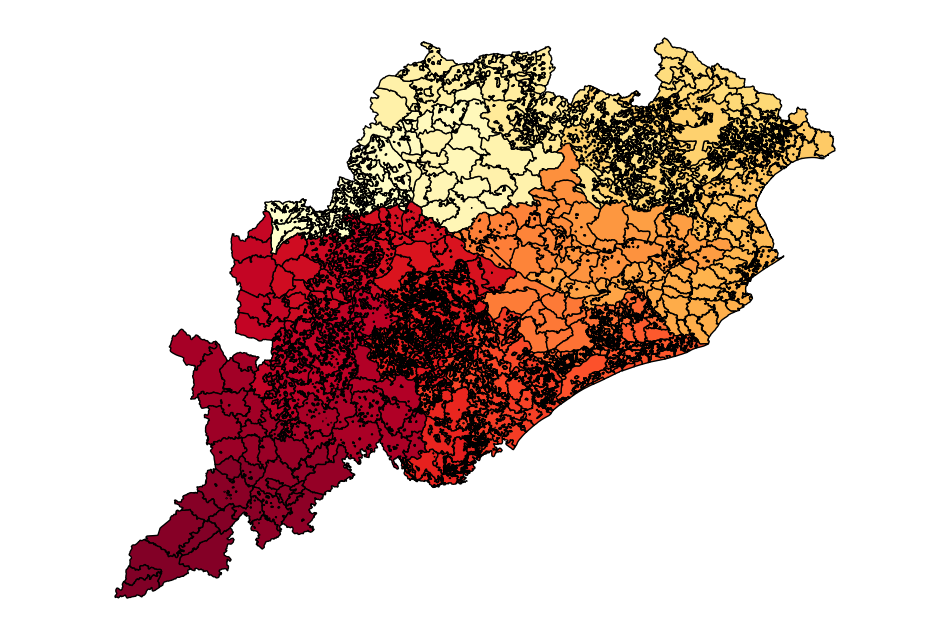

In [ ]:
# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# plot the data using a quantile map of the new ALAND values
regions_agg.plot(edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax,
                 legend = True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

## Merge to create SubDistrict shapefiles 2001 with MetaData

In [ ]:
input_folder = os.path.join(pwd,"Data_2001/Villages2001/With_MetaData")
output_folder = os.path.join(pwd,"Data_2001/SubDistricts2001/2001_With_MetaData")

In [ ]:
columns_to_sum = [
    'No_HH', 'TOT_P', 'TOT_M', 'TOT_F', 'P_06', 'M_06', 'F_06', 'P_SC', 'M_SC', 'F_SC',
    'P_ST', 'M_ST', 'F_ST', 'P_LIT', 'M_LIT', 'F_LIT', 'P_ILL', 'M_ILL', 'F_ILL',
    'TOT_WORK_P', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_P', 'MAINWORK_M', 'MAINWORK_F',
    'MAIN_CL_P', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_P', 'MAIN_AL_M', 'MAIN_AL_F',
    'MAIN_HH_P', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_P', 'MAIN_OT_M', 'MAIN_OT_F',
    'MARGWORK_P', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_P', 'MARG_CL_M', 'MARG_CL_F',
    'MARG_AL_P', 'MARG_AL_M', 'MARG_AL_F', 'MARG_HH_P', 'MARG_HH_M', 'MARG_HH_F',
    'MARG_OT_P', 'MARG_OT_M', 'MARG_OT_F', 'NON_WORK_P', 'NON_WORK_M', 'NON_WORK_F',
    'AREA', 'T_HH', 'T_P', 'T_M', 'T_F', 'SC_P', 'SC_M', 'SC_F', 'ST_P', 'ST_M', 'ST_F',
    'EDU_FAC', 'P_SCH', 'RANG_P_SCH', 'M_SCH', 'RANG_M_SCH', 'S_SCH', 'S_S_SCH', 'COLLEGE',
    'RANG_COLL', 'IND_SCH', 'TR_SCH', 'ADLT_LT_CT', 'OTH_SCH', 'MEDI_FAC', 'ALL_HOSP',
    'RANG_ALL', 'AYU_HOSP', 'UN_HOSP', 'HOM_HOSP', 'ALL_DISP', 'AYU_DISP', 'UN_DISP',
    'HOM_DISP', 'MCW_CNTR', 'RANG_MCW', 'M_HOME', 'CWC', 'H_CNTR', 'PH_CNTR', 'RANG_PHC',
    'PHS_CNT', 'FWC_CNTR', 'TB_CLN', 'N_HOME', 'RMP', 'SMP', 'CHW', 'OTH_CNTR',
    'DRNK_WAT_F', 'RANG_WAT_F', 'TAP', 'WELL', 'TANK', 'TUBEWELL', 'HANDPUMP', 'RIVER',
    'CANAL', 'LAKE', 'SPRING', 'OTHER', 'SOU_SUMM', 'RANG_SS', 'P_T_FAC', 'POST_OFF',
    'RANG_PO', 'TELE_OFF', 'POST_TELE', 'PHONE', 'RANG_PHONE', 'COMM_FAC', 'BS_FAC',
    'RANG_BS', 'RS_FAC', 'RANG_RS', 'NW_FAC', 'RANG_NW', 'BANK_FAC', 'COMM_BANK',
    'RANG_COMM', 'COOP_BANK', 'RANG_COOP', 'CRSOC_FAC', 'AC_SOC', 'RANG_ACS',
    'NAC_SOC', 'RANG_NAC', 'OTHER_SOC', 'RANG_OTH', 'RC_FAC', 'C_V_HALL', 'RANG_CV',
    'SP_CL_FAC', 'RANG_SPCL', 'ST_AU_FAC', 'RANG_STAU', 'APP_PR', 'APP_MR',
    'APP_FP', 'APP_NAVRIV', 'APP_NAVCAN', 'APP_NW'
]

# Iterate over each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".geojson"):  # Ensure it's a GeoJSON file
        # Read the GeoJSON file
        shapefile = gpd.read_file(os.path.join(input_folder, filename))

        # Filter relevant columns
        gdf_temp = shapefile[['STATE', 'DISTRICT', 'SUB_DIST', 'geometry'] + columns_to_sum]

        # Filter out rows where SUB_DIST is 0
        gdf_temp = gdf_temp[gdf_temp['SUB_DIST'] != 0]

        # Dissolve by STATE, DISTRICT, and SUB_DIST with summing the columns
        zones = gdf_temp.dissolve(by=['STATE', 'DISTRICT', 'SUB_DIST'], aggfunc='sum')

        # Save as GeoJSON file
        output_geojson = os.path.join(output_folder, filename)
        zones.to_file(output_geojson, driver='GeoJSON')
        print(f"Processing of {filename} completed.")

Processing of MH.geojson completed.
Processing of BR.geojson completed.
Processing of AP.geojson completed.
Processing of AS.geojson completed.
Processing of CG.geojson completed.
Processing of GA.geojson completed.
Processing of GJ.geojson completed.
Processing of HP.geojson completed.
Processing of HR.geojson completed.
Processing of JH.geojson completed.
Processing of JK.geojson completed.
Processing of KA.geojson completed.
Processing of KL.geojson completed.
Processing of MN.geojson completed.
Processing of MP.geojson completed.
Processing of MZ.geojson completed.
Processing of OR.geojson completed.
Processing of PB.geojson completed.
Processing of RJ.geojson completed.
Processing of SK.geojson completed.
Processing of TN.geojson completed.
Processing of TR.geojson completed.
Processing of UK.geojson completed.
Processing of UP.geojson completed.
Processing of UTERR.geojson completed.
Processing of WB.geojson completed.


# Merge to create SubDistrict shapefiles 2011

In [ ]:
input_folder = os.path.join(pwd,"Data_2011/Villages2011/Without_MetaData")
output_folder = os.path.join(pwd,"Data_2011/SubDistricts2011/2011_Without_MetaData")

In [ ]:
# Iterate over each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".geojson"):  # Ensure it's a GeoJSON file
        # Read the GeoJSON file
        shapefile = gpd.read_file(os.path.join(input_folder, filename))

        # Drop rows where 'pc11_village_id' is 0
        shapefile = shapefile[shapefile['pc11_village_id'] != 0]

        # Select necessary columns
        gdf_temp = shapefile[['STATE', 'DISTRICT', 'SUB_DIST', 'geometry']]

        # Filter out rows where SUB_DIST is 0 (assuming 0 is not a valid subdistrict)
        gdf_temp = gdf_temp[gdf_temp['SUB_DIST'] != 0]

        # Dissolve subdistricts within each district
        zones = gdf_temp.dissolve(by=['STATE', 'DISTRICT', 'SUB_DIST'])

        # Save as GeoJSON file
        output_geojson = os.path.join(output_folder, filename)
        zones.to_file(output_geojson, driver='GeoJSON')
        print("done")

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [ ]:
regions_agg = gpd.read_file(os.path.join(pwd,"Data_2011/SubDistricts2011/2011_Without_MetaData/TN.geojson"))

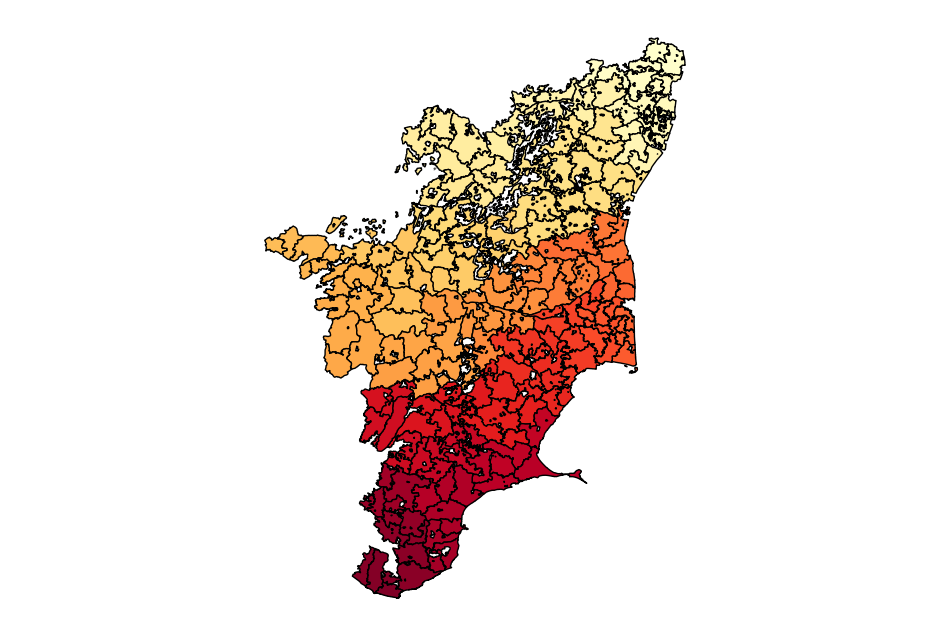

In [ ]:
# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# plot the data using a quantile map of the new ALAND values
regions_agg.plot(edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax,
                 legend = True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

## Merge to create SubDistrict shapefiles 2011 with MetaData

In [ ]:
input_folder = os.path.join(pwd,"Data_2011/Villages2011/With_MetaData")
output_folder = os.path.join(pwd,"Data_2011/SubDistricts2011/2011_With_MetaData")

In [ ]:
# List of columns to be dissolved by summing
columns_to_sum = [
    'No_HH', 'TOT_P', 'TOT_M', 'TOT_F', 'P_06', 'M_06', 'F_06', 'P_SC', 'M_SC',
    'F_SC', 'P_ST', 'M_ST', 'F_ST', 'P_LIT', 'M_LIT', 'F_LIT', 'P_ILL', 'M_ILL',
    'F_ILL', 'TOT_WORK_P', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_P', 'MAINWORK_M',
    'MAINWORK_F', 'MAIN_CL_P', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_P', 'MAIN_AL_M',
    'MAIN_AL_F', 'MAIN_HH_P', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_P', 'MAIN_OT_M',
    'MAIN_OT_F', 'MARGWORK_P', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_P', 'MARG_CL_M',
    'MARG_CL_F', 'MARG_AL_P', 'MARG_AL_M', 'MARG_AL_F', 'MARG_HH_P', 'MARG_HH_M',
    'MARG_HH_F', 'MARG_OT_P', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_P',
    'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_P', 'MARG_CL_3_6_M',
    'MARG_CL_3_6_F', 'MARG_AL_3_6_P', 'MARG_AL_3_6_M', 'MARG_AL_3_6_F',
    'MARG_HH_3_6_P', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_P',
    'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_P', 'MARGWORK_0_3_M',
    'MARGWORK_0_3_F', 'MARG_CL_0_3_P', 'MARG_CL_0_3_M', 'MARG_CL_0_3_F',
    'MARG_AL_0_3_P', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_P',
    'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_P', 'MARG_OT_0_3_M',
    'MARG_OT_0_3_F', 'NON_WORK_P', 'NON_WORK_M', 'NON_WORK_F', 'BF_2001',
    'FC_2001', 'MSW_2001', 'ASSET_2001', 'LIT_2001', 'ADI_2001', 'BF_2011',
    'FC_2011', 'MSW_2011', 'ASSET_2011', 'LIT_2011', 'ADI_2011', 'BF_2019',
    'FC_2019', 'MSW_2019', 'ASSET_2019', 'LIT_2019', 'ADI_2019'
]

# Iterate over each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".geojson"):  # Ensure it's a GeoJSON file
        # Read the GeoJSON file
        shapefile = gpd.read_file(os.path.join(input_folder, filename))

        # Drop rows where 'pc11_village_id' is 0
        shapefile = shapefile[shapefile['pc11_village_id'] != 0]

        # Select relevant columns, including geometry
        gdf_temp = shapefile[['STATE', 'DISTRICT', 'SUB_DIST'] + columns_to_sum + ['geometry']]

        # Filter out rows where SUB_DIST is 0
        gdf_temp = gdf_temp[gdf_temp['SUB_DIST'] != 0]

        # Dissolve by 'STATE', 'DISTRICT', 'SUB_DIST' and sum the specified columns
        zones = gdf_temp.dissolve(by=['STATE', 'DISTRICT', 'SUB_DIST'], aggfunc='sum')

        # Save the dissolved GeoDataFrame as a GeoJSON file
        output_geojson = os.path.join(output_folder, filename)
        zones.to_file(output_geojson, driver='GeoJSON')
        print(f"Processed and saved: {filename}")

Processed and saved: AP.geojson
Processed and saved: AS.geojson
Processed and saved: BR.geojson
Processed and saved: CG.geojson
Processed and saved: GA.geojson
Processed and saved: GJ.geojson
Processed and saved: HR.geojson
Processed and saved: HP.geojson
Processed and saved: JK.geojson
Processed and saved: JH.geojson
Processed and saved: KA.geojson
Processed and saved: KL.geojson
Processed and saved: MP.geojson
Processed and saved: MH.geojson
Processed and saved: MN.geojson
Processed and saved: MZ.geojson
Processed and saved: OR.geojson
Processed and saved: PB.geojson
Processed and saved: RJ.geojson
Processed and saved: SK.geojson
Processed and saved: TN.geojson
Processed and saved: TR.geojson
Processed and saved: UP.geojson
Processed and saved: UK.geojson
Processed and saved: WB.geojson


In [ ]:
regions_agg = gpd.read_file(os.path.join(pwd,"Data_2011/SubDistricts2011/2011_With_MetaData/TN.geojson"))

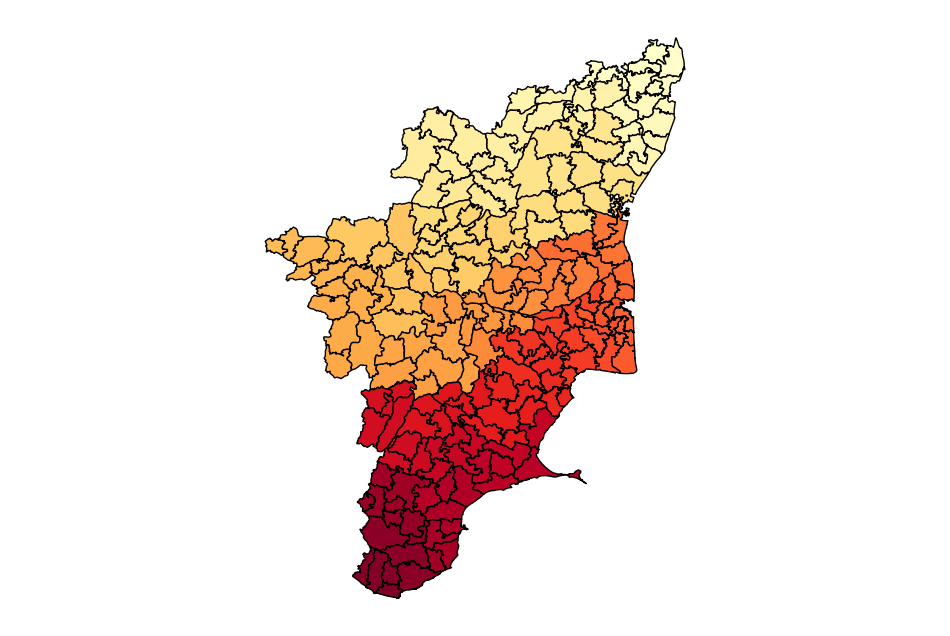

In [ ]:
# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# plot the data using a quantile map of the new ALAND values
regions_agg.plot(edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax,
                 legend = True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

# Merge to create District shapefiles 2001

In [ ]:
input_folder = os.path.join(pwd,"Villages2001/Without_MetaData")
output_folder = os.path.join(pwd,"Districts/2001_Without_MetaData")

In [ ]:
# Iterate over each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".geojson"):  # Ensure it's a GeoJSON file
        # Read the GeoJSON file
        shapefile = gpd.read_file(os.path.join(input_folder, filename))

        # Select necessary columns
        gdf_temp = shapefile[['STATE', 'DISTRICT', 'geometry']]

        # Filter out rows where SUB_DIST is 0 (assuming 0 is not a valid subdistrict)
        gdf_temp = gdf_temp[gdf_temp['DISTRICT'] != 0]

        # Dissolve subdistricts within each district
        zones = gdf_temp.dissolve(by=['STATE', 'DISTRICT'])

        # Save as GeoJSON file
        output_geojson = os.path.join(output_folder, filename)
        zones.to_file(output_geojson, driver='GeoJSON')
        print("done")

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [ ]:
regions_agg = gpd.read_file(os.path.join(pwd,"Districts/2001_Without_MetaData/MH.geojson"))

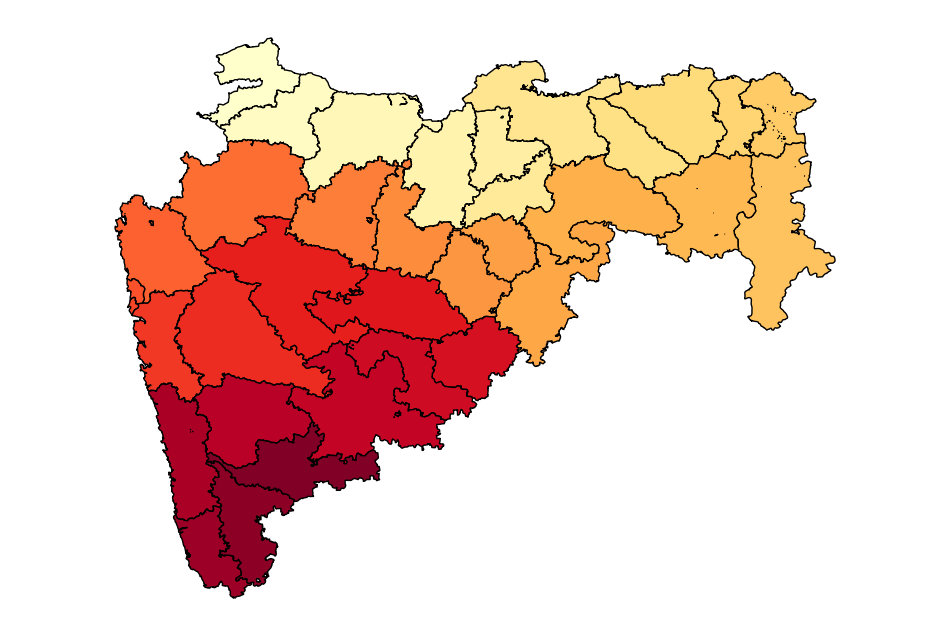

In [ ]:
# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# plot the data using a quantile map of the new ALAND values
regions_agg.plot(edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax,
                 legend = True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

# Merge to create District shapefiles 2011

In [ ]:
input_folder = os.path.join(pwd,"Data_2011/Villages2011/Without_MetaData")
output_folder = os.path.join(pwd,"Data_2011/Districts2011/2011_Without_MetaData")

In [ ]:
# Iterate over each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".geojson"):  # Ensure it's a GeoJSON file
        # Read the GeoJSON file
        shapefile = gpd.read_file(os.path.join(input_folder, filename))

        shapefile = shapefile[shapefile['pc11_village_id'] != 0]

        # Select necessary columns
        gdf_temp = shapefile[['STATE', 'DISTRICT', 'geometry']]

        # Filter out rows where SUB_DIST is 0 (assuming 0 is not a valid subdistrict)
        gdf_temp = gdf_temp[gdf_temp['DISTRICT'] != 0]

        # Dissolve subdistricts within each district
        zones = gdf_temp.dissolve(by=['STATE', 'DISTRICT'])

        # Save as GeoJSON file
        output_geojson = os.path.join(output_folder, filename)
        zones.to_file(output_geojson, driver='GeoJSON')
        print("done")

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [ ]:
regions_agg = gpd.read_file(os.path.join(pwd,"Data_2011/Districts2011/2011_Without_MetaData/MH.geojson"))

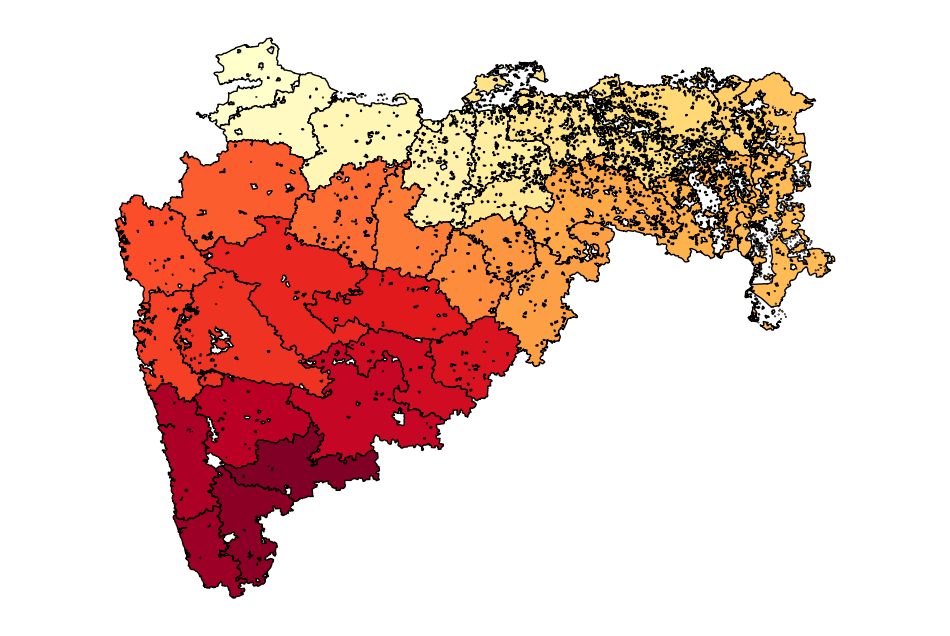

In [ ]:
# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# plot the data using a quantile map of the new ALAND values
regions_agg.plot(edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax,
                 legend = True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

# Merge to create State shapefiles 2001

In [ ]:
input_folder = os.path.join(pwd,"Villages2001/Without_MetaData")
output_folder = os.path.join(pwd,"States/2001_Without_MetaData")

In [ ]:
# Iterate over each file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith(".geojson"):  # Ensure it's a GeoJSON file
        # Read the GeoJSON file
        shapefile = gpd.read_file(os.path.join(input_folder, filename))

        # Select necessary columns
        gdf_temp = shapefile[['STATE', 'geometry']]

        # Filter out rows where SUB_DIST is 0 (assuming 0 is not a valid subdistrict)
        gdf_temp = gdf_temp[gdf_temp['STATE'] != 0]

        # Dissolve subdistricts within each district
        zones = gdf_temp.dissolve(by=['STATE'])

        # Save as GeoJSON file
        output_geojson = os.path.join(output_folder, filename)
        zones.to_file(output_geojson, driver='GeoJSON')
        print("done")

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [ ]:
regions_agg = gpd.read_file(os.path.join(pwd,"States/2001_Without_MetaData/WB.geojson"))

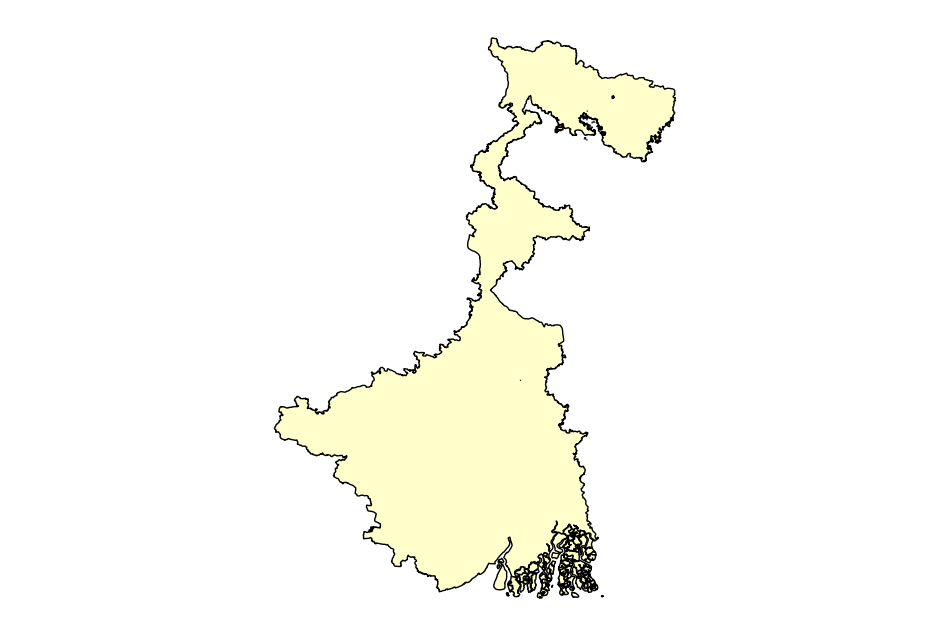

In [ ]:
# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# plot the data using a quantile map of the new ALAND values
regions_agg.plot(edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax,
                 legend = True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

# LOAD ALL INDIVIDUAL GEOJSON FILES AND MERGE TO FORM A SINGLE GEOJSON FILE

In [ ]:
def combine_geojson_files(input_folder, output_file):
    # Initialize an empty list to hold GeoDataFrames
    gdfs = []

    # Loop through all files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith('.geojson'):
            file_path = os.path.join(input_folder, filename)
            try:
                # Read each GeoJSON file into a GeoDataFrame
                gdf = gpd.read_file(file_path)
                # Append the GeoDataFrame to the list
                gdfs.append(gdf)
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

    # Concatenate all GeoDataFrames in the list
    if gdfs:
        combined_gdf = pd.concat(gdfs, ignore_index=True)

        # Save the combined GeoDataFrame to a new GeoJSON file
        combined_gdf.to_file(output_file, driver='GeoJSON')
    else:
        print("No valid GeoJSON files found to combine.")

# Example usage
input_folder = os.path.join(pwd,"SubDistricts/2001_Without_MetaData")  # Replace with the path to your folder
output_file = os.path.join(pwd,"SubDistricts/2001_Without_MetaData_combined_output.geojson")  # Replace with the desired output file path

combine_geojson_files(input_folder, output_file)


In [ ]:
regions_agg = gpd.read_file(os.path.join(pwd,"SubDistricts/2001_Without_MetaData_combined_output.geojson"))

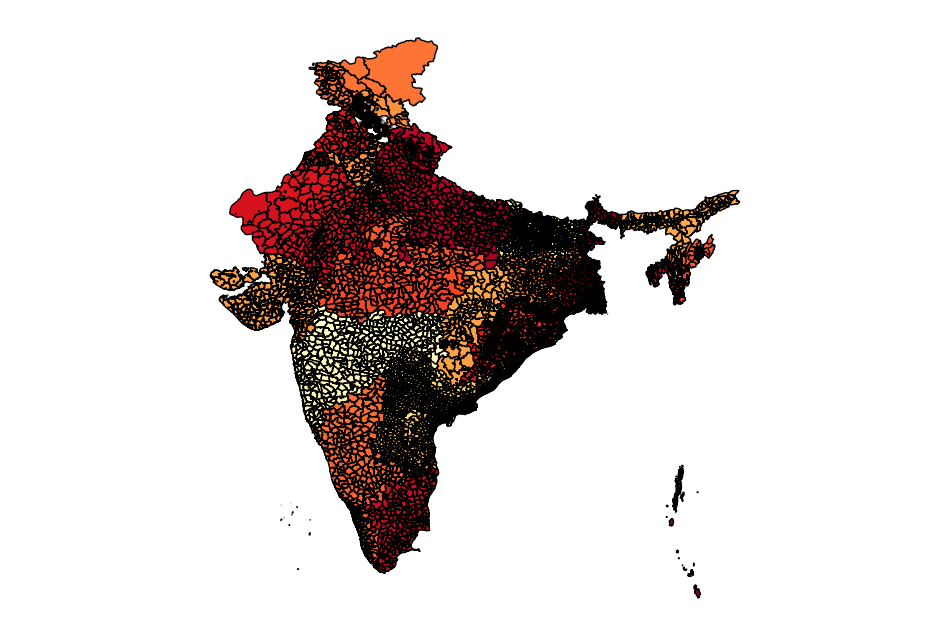

In [ ]:
# create the plot
fig, ax = plt.subplots(figsize = (12,8))

# plot the data using a quantile map of the new ALAND values
regions_agg.plot(edgecolor = "black",
                 scheme='quantiles', cmap='YlOrRd', ax=ax,
                 legend = True)


# Set plot axis to equal ratio
ax.set_axis_off()
plt.axis('equal');

# Convert GEOJSON to CSV

In [ ]:
file_path = os.path.join(pwd, "SubDistricts/2001_Without_MetaData_combined_output.geojson")
gpd = gpd.read_file(file_path)

# Save the GeoDataFrame to a .csv file
output_csv_path = os.path.join(pwd, "SubDistricts/2001_Without_MetaData_combined_output.csv")
gpd.to_csv(output_csv_path, index=False)

print(f"Conversion complete! CSV saved as '{output_csv_path}'")

Conversion complete! CSV saved as '/content/drive/MyDrive/Admin_boundaries(Aatif)/Shapefiles/SubDistricts/2001_Without_MetaData_combined_output.csv'


## ADD RWI

In [ ]:
input_geojson_folder = os.path.join(pwd,"Data_2011/Villages2011/With_MetaData")
output_geojson_folder = os.path.join(pwd,"Data_2011/Villages2011/With_MetaData_AHI&RWI")
awi_data_path = os.path.join(pwd,"Prerequisites/combined_rwi_data.csv")

In [ ]:
# Load and process the population data
awi = pd.read_csv(awi_data_path)

In [ ]:
# Dictionary to map filenames to state IDs
state_id_dict = {
    "AP.geojson": 28,
    "AS.geojson": 18,
    "BR.geojson": 10,
    "CG.geojson": 22,
    "GA.geojson": 30,
    "GJ.geojson": 24,
    "HR.geojson": 6,
    "HP.geojson": 2,
    "JK.geojson": 1,
    "JH.geojson": 20,
    "KA.geojson": 29,
    "KL.geojson": 32,
    "MP.geojson": 23,
    "MH.geojson": 27,
    "MN.geojson": 14,
    "MZ.geojson": 15,
    "OR.geojson": 21,
    "PB.geojson": 3,
    "RJ.geojson": 8,
    "SK.geojson": 11,
    "TN.geojson": 33,
    "TR.geojson": 16,
    "UP.geojson": 9,
    "UK.geojson": 5,
    "WB.geojson": 19,
    #"UTERR.geojson"    # SINCE UTERR.geojson has multiple State IDs
}

In [ ]:
awi = awi.set_index('Village_ID')
#awi = awi.set_index('Village_ID', drop=False)

In [ ]:
# Loop through the state_id_dict to process each file
for filename, state_id in state_id_dict.items():


    # Construct the full path to the input GeoJSON file
    input_geojson_path = os.path.join(input_geojson_folder, filename)

    # Load the GeoJSON file
    gdf = gpd.read_file(input_geojson_path)
    gdf = gdf.set_index('pc11_village_id')
    #gdf = gdf.set_index('pc11_village_id', drop=False)
    gdf.index = gdf.index.astype(int)

    # Join the GeoJSON data with the features data
    shapefiles_2011 = gdf.join(awi)
    shapefiles_2011.fillna(0, inplace=True)

    # Construct the output path
    output_geojson_path = os.path.join(output_geojson_folder, filename)

    # Save the final GeoJSON file
    shapefiles_2011.to_file(output_geojson_path, driver="GeoJSON")
    print("Done!")

Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
Done!
